# Introduction

For this final project we will be participating in Kaggle's "House Prices - Advanced Regression Techniques" competition: 

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

The goal is to predict house prices based on multiple criteria. 

The data used for this competition is the Ames Housing dataset compiled by Dean De Cock.

The evaluation metric for the predictions is Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

GitHub repository for this project can be found here:

https://github.com/nabilahforuni/house_prices

## Part 1 EDA

We will beging with loading and exploring the dataset.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import root_mean_squared_log_error as rmsle

import xgboost as xgb

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Check for duplicates in the data.

In [5]:
train_df[train_df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Some columns have large numbers of missing data - we will later exclude those columns from analysis.

In [7]:
(train_df.isna().sum() / train_df.shape[0]).sort_values(ascending=False).head(10)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
FireplaceQu    0.472603
LotFrontage    0.177397
GarageYrBlt    0.055479
GarageCond     0.055479
GarageType     0.055479
dtype: float64

In [8]:
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'Id']

Check the data types.

In [9]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [10]:
test_df.dtypes.value_counts()

object     43
int64      26
float64    11
Name: count, dtype: int64

Something does not look right here - number of float and integer columns are different in training and testing data. Let's see what columns have wrond data types.

In [11]:
train_df.select_dtypes(include='float').head(3)

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0


In [12]:
test_df.select_dtypes(include='float').head(3)

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.0,1.0,730.0
1,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.0,1.0,312.0
2,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.0,2.0,482.0


Convert columns from integer to float data type.

In [13]:
columns_int2float = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'SalePrice']

In [14]:
train_df = train_df.astype({col: 'float64' for col in columns_int2float})
train_df.select_dtypes(include='float').head(3)

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0


Now looks good (one additional float column is the sale price that we will be predicting and that is obviuosly missing from the testing dataset).

In [15]:
train_df.dtypes.value_counts()

object     43
int64      26
float64    12
Name: count, dtype: int64

In the numerical columns zeroes are in most cases also indicate missing data. Let's see which columns have a lot of them.

In [16]:
((train_df.select_dtypes(include='float') == 0).sum() / train_df.shape[0]).sort_values(ascending=False)

BsmtHalfBath    0.943836
BsmtFinSF2      0.885616
MasVnrArea      0.589726
BsmtFullBath    0.586301
BsmtFinSF1      0.319863
BsmtUnfSF       0.080822
GarageCars      0.055479
GarageArea      0.055479
TotalBsmtSF     0.025342
LotFrontage     0.000000
GarageYrBlt     0.000000
SalePrice       0.000000
dtype: float64

Add the columns with many zeroes to the list of columns to be dropped.

In [17]:
columns_to_drop.extend(['BsmtHalfBath', 'BsmtFinSF2', 'MasVnrArea', 'BsmtFullBath', 'BsmtFinSF1'])

Do the same with integer features.

In [18]:
((train_df.select_dtypes(include='int') == 0).sum() / train_df.shape[0]).sort_values(ascending=False).head(15)

PoolArea         0.995205
3SsnPorch        0.983562
LowQualFinSF     0.982192
MiscVal          0.964384
ScreenPorch      0.920548
EnclosedPorch    0.857534
HalfBath         0.625342
2ndFlrSF         0.567808
WoodDeckSF       0.521233
Fireplaces       0.472603
OpenPorchSF      0.449315
FullBath         0.006164
BedroomAbvGr     0.004110
KitchenAbvGr     0.000685
MoSold           0.000000
dtype: float64

In [19]:
columns_to_drop.extend(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch', 'EnclosedPorch'])

Let's the correlation between different features.

<Axes: >

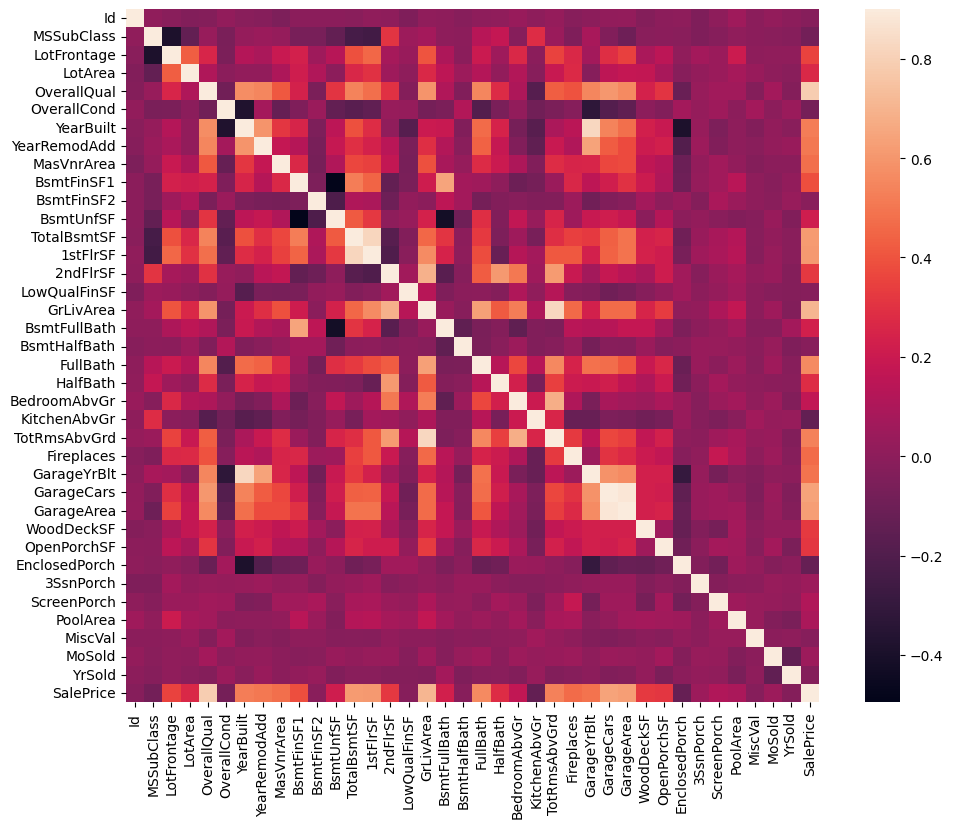

In [20]:
corr_matrix = train_df.select_dtypes(include=['int', 'float']).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

We will drop features with strong possitive correlation (such as 'GarageYrBlt'), strong negative correlation ('TotalBsmtSF') and ones that have low correlation with target feature ('KitchenAbvGr').

In [21]:
columns_to_drop.extend(['GarageYrBlt', 'TotRmsAbvGrd', 'TotalBsmtSF', 'GarageCars', 'MSSubClass', 'OverallCond', 'MoSold', 'YrSold', 'KitchenAbvGr'])

## Part 2 Data Cleaning and Preprocessing

In [22]:
print(len(columns_to_drop))
sorted(columns_to_drop)

27


['3SsnPorch',
 'Alley',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'EnclosedPorch',
 'Fence',
 'FireplaceQu',
 'GarageCars',
 'GarageYrBlt',
 'Id',
 'KitchenAbvGr',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'OverallCond',
 'PoolArea',
 'PoolQC',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YrSold']

The have a total of 27 columns that we decided to exclude from analysis. Let's drop those columns from both training and testing datasets.

In [23]:
train_df = train_df.drop(columns=columns_to_drop)
train_df.shape

(1460, 54)

In [24]:
test_df = test_df.drop(columns=columns_to_drop)
test_df.shape

(1459, 53)

Numerical columns will be normalized before fitting a model.

In [25]:
numerical = list(train_df.select_dtypes(exclude='O').columns)
numerical.remove('SalePrice')
numerical

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

Impute missing data in numerical columns with zeroes.

In [26]:
train_df[numerical] = train_df[numerical].fillna(0)
test_df[numerical] = test_df[numerical].fillna(0)

Non-numeric features need to be separated into two groups: categorical and ordinal. Features in the first group will be one-hot encoded and features from the second will be encoded with ordinal encoder.

In [27]:
train_df.select_dtypes(include='O').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
categorical_ordinal = ['LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 
                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']
categorical_one_hot = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 
                       'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

Prepare ordered categories for ordinal features.

In [29]:
ordinal_categories = [
    list(reversed(['Gtl', 'Mod', 'Sev'])),
    list(reversed(['Ex', 'Gd', 'TA', 'Fa', 'Po'])),
    list(reversed(['Ex', 'Gd', 'TA', 'Fa', 'Po'])),
    list(reversed(['Ex', 'Gd', 'TA', 'Fa', 'Po'])),
    list(reversed(['Ex', 'Gd', 'TA', 'Fa', 'Po'])),
    list(reversed(['Gd', 'Av', 'Mn', 'No'])),
    list(reversed(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'])),
    list(reversed(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'])),
    list(reversed(['Ex', 'Gd', 'TA', 'Fa', 'Po'])),
    list(reversed(['Ex', 'Gd', 'TA', 'Fa', 'Po'])),
    list(reversed(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'])),
    list(reversed(['Fin', 'RFin', 'Unf'])),
    list(reversed(['Ex', 'Gd', 'TA', 'Fa', 'Po'])),
    list(reversed(['Ex', 'Gd', 'TA', 'Fa', 'Po'])),
    list(reversed(['Y', 'P', 'N'])),
]

Split traing dataset into training and validation sets.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df.iloc[:, :-1], train_df.SalePrice, test_size=0.2, random_state=42)

Create a preprocessor that will perform necessary transformations of every feature.

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(handle_unknown='ignore'), categorical_one_hot),
        ('ordinal',
         OrdinalEncoder(categories=ordinal_categories,
                        handle_unknown='use_encoded_value',
                        unknown_value=-1, 
                        encoded_missing_value=-1),
         categorical_ordinal),
        ('numerical', StandardScaler(), numerical)
    ]
)

In [32]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Part 3 Model building and comparison

First, we will try a simple linear regression model.

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
rmsle(y_test, y_pred)

0.16365716663995036

Second, let's give random forest a try.

In [36]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rmsle(y_test, y_pred)

0.15987663603761862

Fine-tune hyperparameters of random forest by performing a grid search.

In [37]:
rf = RandomForestRegressor(random_state=42)

grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gs = GridSearchCV(
    estimator=rf, 
    param_grid=grid,
    scoring='neg_root_mean_squared_log_error',
    n_jobs=8
)

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

best_rf_model = gs.best_estimator_

{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
-0.14773218587679676


In [38]:
y_pred = best_rf_model.predict(X_test)
rmsle(y_test, y_pred)

0.1570842597789459

Third option - gradient boosting regressor.

In [42]:
gbr_model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42
)

gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
rmsle(y_test, y_pred)

0.14683517824319223

Lastly, as the competition description suggested, we will try XGBoost.

In [45]:
xgb_model = xgb.XGBRegressor(
    learing_rate=0.01,
    n_estimators=1000
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
rmsle(y_test, y_pred)

/home/nic/Programs/Data Science/.venv/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [12:05:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "learing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


0.14377226279950742

Now let's compare the models and visualize the results.

In [53]:
models = {
    'LR': lr_model,
    'RF': rf_model,
    'RF fine-tuned': best_rf_model,
    'GBR': gbr_model,
    'XGB': xgb_model
}

results = {}
for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    results[name] = {
        'train': rmsle(y_train, y_pred_train),
        'validation': rmsle(y_test, y_pred_test)
    }

<Axes: >

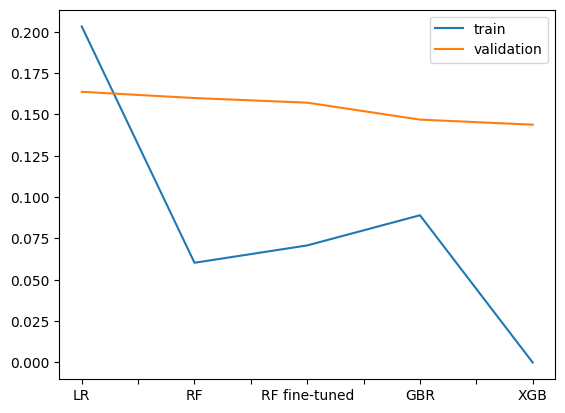

In [54]:
df = pd.DataFrame(results).transpose()
df.plot()

## Part 4 Submission and conclusions

As can be seen from the graph above, validation set score is pretty much the same for all models, but training set score is by far the best with XGBoost. The difference between training and validation scored indicate signs of overfitting but XGBoost still gave the best results in the competition.

In [55]:
X_test = preprocessor.transform(test_df)
y_pred = xgb_model.predict(X_test)

In [56]:
submission = pd.read_csv('data/sample_submission.csv')
submission.SalePrice = y_pred
submission.to_csv('submission.csv', index=False)

This submission recieved a score of 0.14758 which is not that bad.

After training multiple regression models we can clearly see that more modern and powerfull techniques outperform older ones. Hurray to the progress!

## References

[1] https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

[2] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

[5] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

[6] https://github.com/dmlc/xgboost